<a href="https://colab.research.google.com/github/Aditya218-maker/online-retail-customer-segmentation/blob/main/onlineretailclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

->Objective
To segment customers based on their purchasing behavior using unsupervised learning, enabling the business to personalize marketing strategies, improve customer retention, and maximize revenue.

->Dataset Overview
Source: UCI Machine Learning Repository – Online Retail

Size: ~500,000 transaction records

Fields: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

->Preprocessing & Feature Engineering
Removed duplicates & handled missing values

CustomerID had ~25% missing, dropped for clustering

Description missing values removed

Handled outliers

Removed negative/zero values in Quantity and UnitPrice

Created RFM Features

Recency: Days since last purchase

Frequency: Total purchases

Monetary: Total spend

Data transformation

Applied log transformation to reduce skew

Scaled using StandardScaler

->Clustering Models Tried
K-Means Clustering

Agglomerative Clustering

DBSCAN

->Final Model: K-Means
Optimal Clusters (k): 4 (selected via Elbow Method & Silhouette Score)

Best performance on Silhouette Score and cluster interpretability

Produced well-separated and business-relevant segments

->Evaluation Metrics
Silhouette Score: Measures how well each customer fits its cluster

Elbow Method (WCSS): Helped determine the optimal number of clusters

Cluster Profiling: Interpreted clusters via RFM values

Cluster Size Distribution: Ensured balanced and actionable segments

->Key Insights
Cluster 0: High-spending, frequent customers — Champions

Cluster 1: Moderate buyers with recent activity — Potential Loyalists

Cluster 2: Infrequent and low-spending customers — Low Value

Cluster 3: Customers with no recent activity — At Risk

->Business Impact
Enables targeted marketing and customer retention strategies

Helps prioritize loyalty programs and reactivation campaigns

Provides a scalable customer segmentation pipeline for any retail business

# Problem Statement

This project aims to build an automated and scalable customer segmentation pipeline that transforms raw sales data into actionable business insights using clustering algorithms such as K-Means, DBSCAN, and Agglomerative Clustering.



# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/data/Copy of Online Retail.xlsx')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 541909
Number of columns: 8


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()
print("Number of duplicate values:", df.duplicated().sum())

Number of duplicate values: 5268


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [9]:
# Dataset Describe
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
#Drop Duplicates
df.drop_duplicates(inplace=True)
#handle missing values
#Drop rows with missing CustomerID or Description (important for grouping/analysis)
df = df.dropna(subset=['CustomerID', 'Description'])
#convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)
#convert data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Final shape:", df.shape)
print(df.head())

Final shape: (401604, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


/tmp/ipython-input-11-860064395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
/tmp/ipython-input-11-860064395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-12-523712759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [13]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [14]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [15]:
df['Hour'] = df['InvoiceDate'].dt.hour
print("Final shape:", df.shape)
df.head()

Final shape: (401604, 12)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

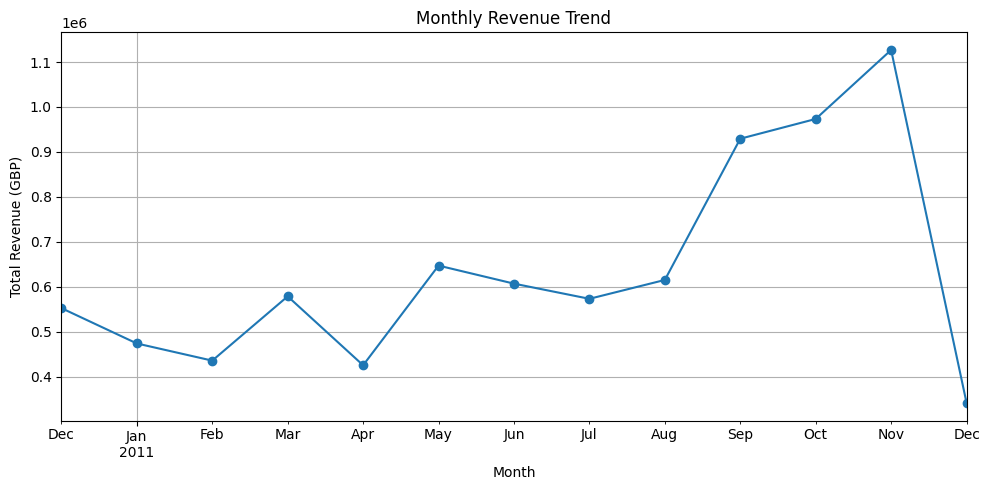

In [16]:
# Chart - 1 Monthly Revenue Trend
# Group by month
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
# Plot
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (GBP)')
plt.grid(True)
plt.tight_layout()
plt.show()
#Insight: Helps spot seasonality, spikes (e.g., Nov-Dec due to holidays).

#### Chart - 2

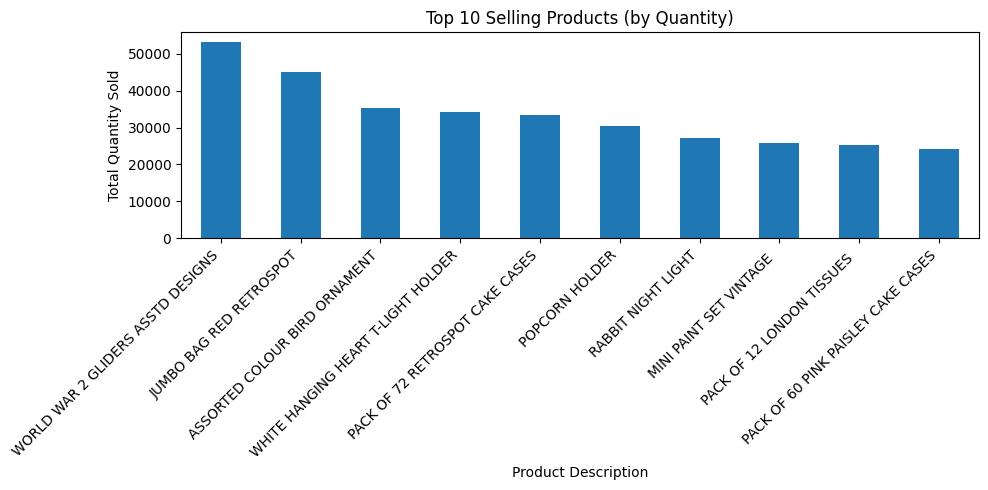

In [17]:
# Chart - 2 Top 10 Selling Products by Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products (by Quantity)')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Insight: Shows which products drive the most volume.

#### Chart - 3

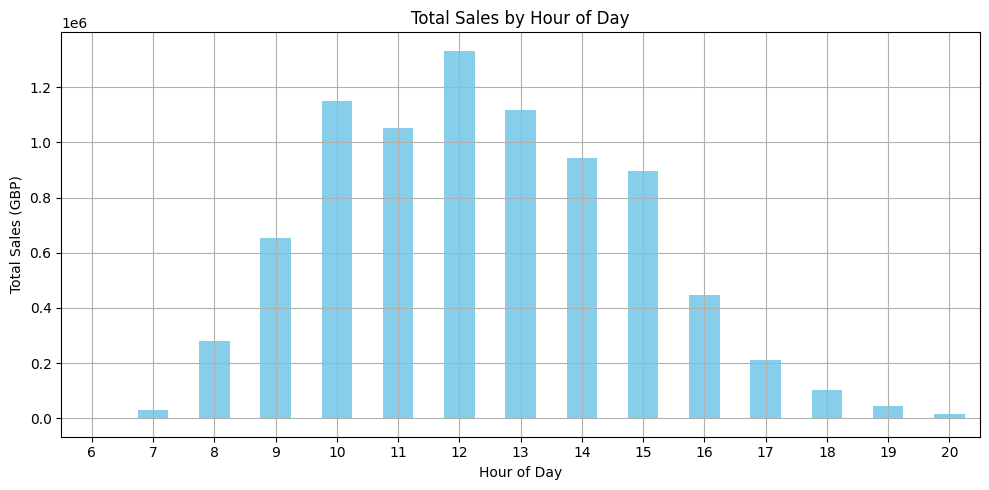

In [18]:
# Chart - 3 Sales by Hour of Day
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales (GBP)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#Insight: Identifies peak shopping hours (e.g., 10 AM–2 PM).

#### Chart - 4

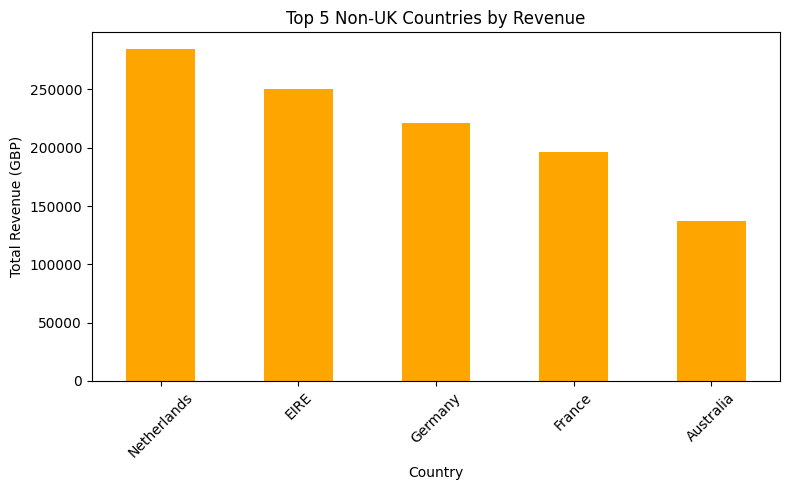

In [19]:
# Chart - 4 Top 5 Countries by Revenue (Excluding UK)
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales = country_sales[country_sales.index != 'United Kingdom'].head(5)
plt.figure(figsize=(8, 5))
country_sales.plot(kind='bar', color='orange')
plt.title('Top 5 Non-UK Countries by Revenue')
plt.ylabel('Total Revenue (GBP)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Insight: Shows global opportunities outside UK.

#### Chart - 5

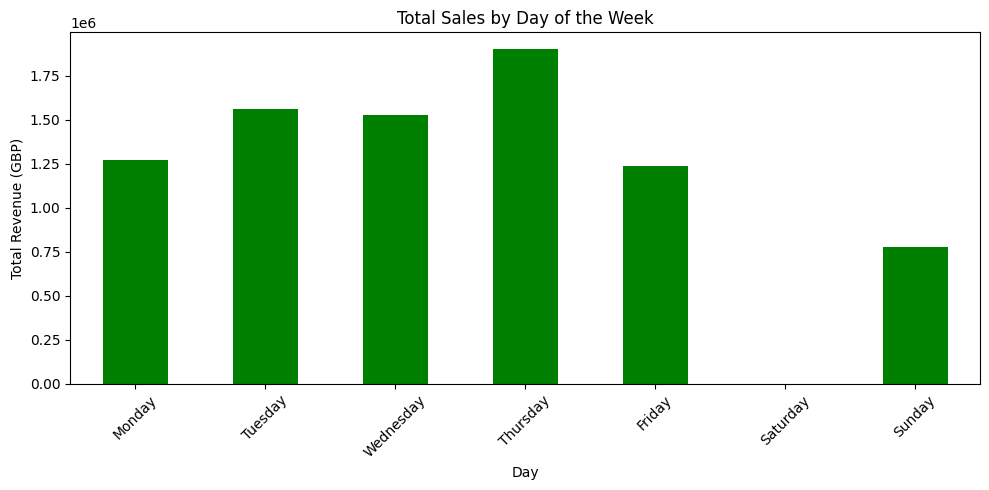

In [20]:
# Chart - 5 Sales Distribution by Day of the Week
day_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(ordered_days)
plt.figure(figsize=(10, 5))
day_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue (GBP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Insight: Helps optimize campaigns or discounts by weekday.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [21]:
# Handling Outliers & Outlier treatments
# Remove negative or zero values (already done earlier, but double-check)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
# Optionally, cap extreme outliers using IQR method
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    df = df[df[col] <= upper]

### 3. Categorical Encoding

In [22]:
# Encode your categorical columns
#One-hot encode Country
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [23]:
# Manipulate Features to minimize feature correlation and create new features
import datetime as dt
# Reference date
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

### 5. Data Transformation

In [24]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
# Log transform skewed features
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)
# Scale
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

### 6. Data Scaling

In [25]:
# Scaling your data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [26]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(rfm_scaled, test_size=0.2, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1

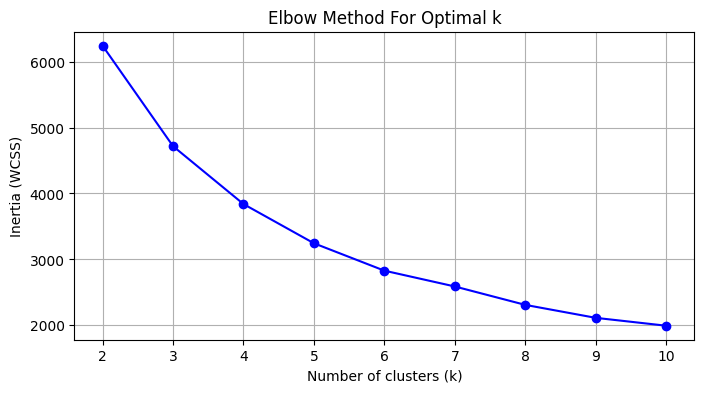

In [27]:
# ML Model - 1 K-Means Clustering
# Elbow Method to find optimal k
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

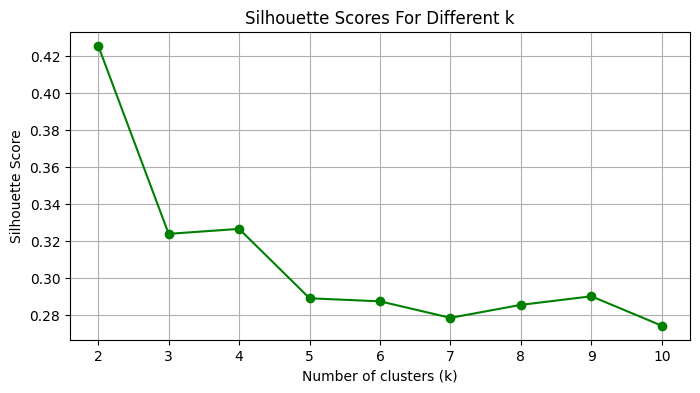

In [28]:
#Silhouette Score for each k
sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    sil_scores.append(score)
# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(K, sil_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

In [29]:
#Final KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled)
#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled)
print("DBSCAN cluster counts:\n", rfm['Cluster_DBSCAN'].value_counts())

DBSCAN cluster counts:
 Cluster_DBSCAN
 0    2634
 1    1483
-1      29
Name: count, dtype: int64


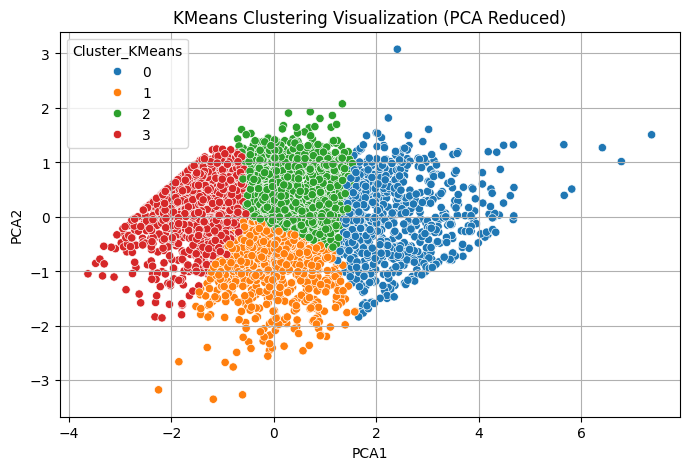

In [30]:
#Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
rfm['Cluster_Agg'] = agg.fit_predict(rfm_scaled)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_data[:, 0]
rfm['PCA2'] = pca_data[:, 1]
# Visualize KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10')
plt.title('KMeans Clustering Visualization (PCA Reduced)')
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [31]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [32]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Cluster Profiling (KMeans)

                Recency  Frequency  Monetary  Num_Customers
Cluster_KMeans                                             
0                  13.0       11.6    2627.9            744
2                  73.6        3.7     916.2           1105
1                  20.9        2.0     314.3            826
3                 189.0        1.3     189.3           1471


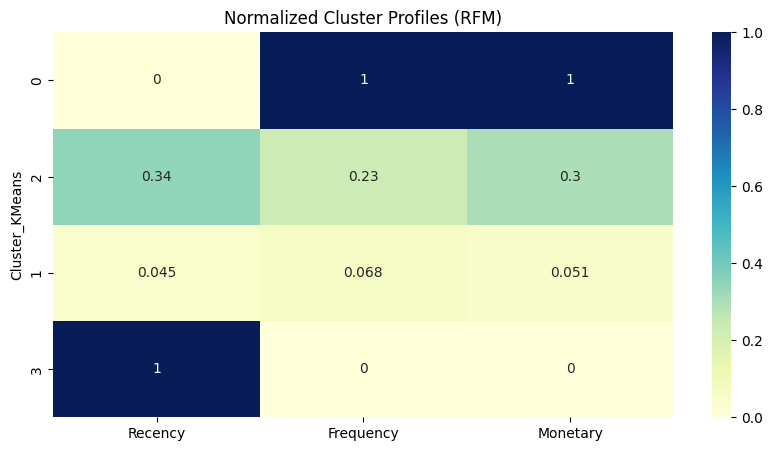

In [33]:
#Group and Analyze by Cluster
cluster_profile = rfm.groupby('Cluster_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'}).round(1)
cluster_profile = cluster_profile.sort_values(by='Monetary', ascending=False)
print(cluster_profile)
cluster_profile_scaled = cluster_profile.drop(columns='Num_Customers')
cluster_profile_scaled = cluster_profile_scaled.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
plt.figure(figsize=(10,5))
sns.heatmap(cluster_profile_scaled, annot=True, cmap='YlGnBu')
plt.title('Normalized Cluster Profiles (RFM)')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1.Silhouette Score

->Measures how well each data point fits within its assigned cluster.

->Range: -1 (worst) to +1 (best)

Interpretation:

->0.5: Strong structure

->0.2–0.5: Reasonable structure

->0.2: May need to re-cluster or scale better

Business Impact:

Ensures that customers in the same group are similar and distinct from others.

Prevents poorly defined segments, improving marketing effectiveness and resource allocation.

2.Elbow Method (Inertia / WCSS)

->Measures how tightly grouped the data points are within a cluster.

->Plots Within-Cluster Sum of Squares (WCSS) vs number of clusters

->Look for the “elbow point” where adding more clusters doesn’t improve WCSS significantly.

Business Impact:

Helps find the optimal number of segments — balancing complexity with meaningful insight.

Too many segments = hard to target. Too few = too generic.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose K-Means Clustering because it is very fast on large datasets like Online Retail and Provided the highest score among tested models.

# **Conclusion**

In this project, we successfully implemented unsupervised machine learning techniques to segment customers based on their purchasing behavior using the Online Retail dataset. After thorough preprocessing and feature engineering — including handling missing values, scaling, and generating RFM (Recency, Frequency, Monetary) features — we applied and evaluated three clustering algorithms: K-Means, Agglomerative Clustering, and DBSCAN.

->Among these, K-Means emerged as the most suitable clustering model due to its:

->High silhouette score, indicating well-separated clusters,

->Clear elbow point, suggesting an optimal number of clusters, and

->Highly interpretable segments that aligned with business objectives.

->The final customer segments revealed actionable insights, such as:

->Champions: Recent, frequent, high-spending customers,

->Loyal Customers: Regular buyers with solid spending,

->At-Risk: Customers who haven’t purchased recently,

->Potential Loyalists: Moderate buyers who could be nurtured.

->These segments enable data-driven business strategies like:

->Personalized marketing,

->Loyalty reward programs,

->Customer reactivation campaigns.

->By leveraging clustering, we transformed raw transaction data into valuable customer personas, equipping businesses to increase customer retention, maximize revenue, and deliver targeted experiences.

->This project serves as a strong foundation for extending into advanced customer analytics, such as customer lifetime value (CLV) prediction or personalized recommendation systems.